In [11]:
# Cell 1: Install and Import Required Libraries
# Install additional libraries if needed and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib  # For saving the trained model

In [12]:
# Cell 2: Load the Dataset
# Load the train and test datasets into pandas DataFrames
train_file_path = "/content/train_energy_data.csv"
test_file_path = "/content/test_energy_data.csv"

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

Training Data:
  Building Type  Square Footage  Number of Occupants  Appliances Used  \
0   Residential            7063                   76               10   
1    Commercial           44372                   66               45   
2    Industrial           19255                   37               17   
3   Residential           13265                   14               41   
4    Commercial           13375                   26               18   

   Average Temperature Day of Week  Energy Consumption  
0                29.84     Weekday             2713.95  
1                16.72     Weekday             5744.99  
2                14.30     Weekend             4101.24  
3                32.82     Weekday             3009.14  
4                11.92     Weekday             3279.17  


In [13]:
# Cell 3: Data Preprocessing
# Check for missing values
print("Missing Values in Training Data:\n", train_data.isnull().sum())

# Handle missing values (if any) - Example: Impute with mean (or other strategies)
# Select only numeric columns for calculating the mean
numeric_columns = train_data.select_dtypes(include=np.number).columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].mean())

# Convert categorical features to numeric using one-hot encoding
# Include 'Day of Week' in the list of columns to encode
categorical_features = ["Building Type", "Day of Week"]
train_data = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)

# Ensure that both datasets have the same columns after encoding
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[train_data.columns] # Ensure the order of columns is the same

# Normalize/Standardize the data (for numerical features)
scaler = StandardScaler()
numerical_features = ["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature"]
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Save the scaler to a file
import pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Separate features and target variable
X_train = train_data.drop("Energy Consumption", axis=1)
y_train = train_data["Energy Consumption"]
X_test = test_data.drop("Energy Consumption", axis=1)
y_test = test_data["Energy Consumption"]

Missing Values in Training Data:
 Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64


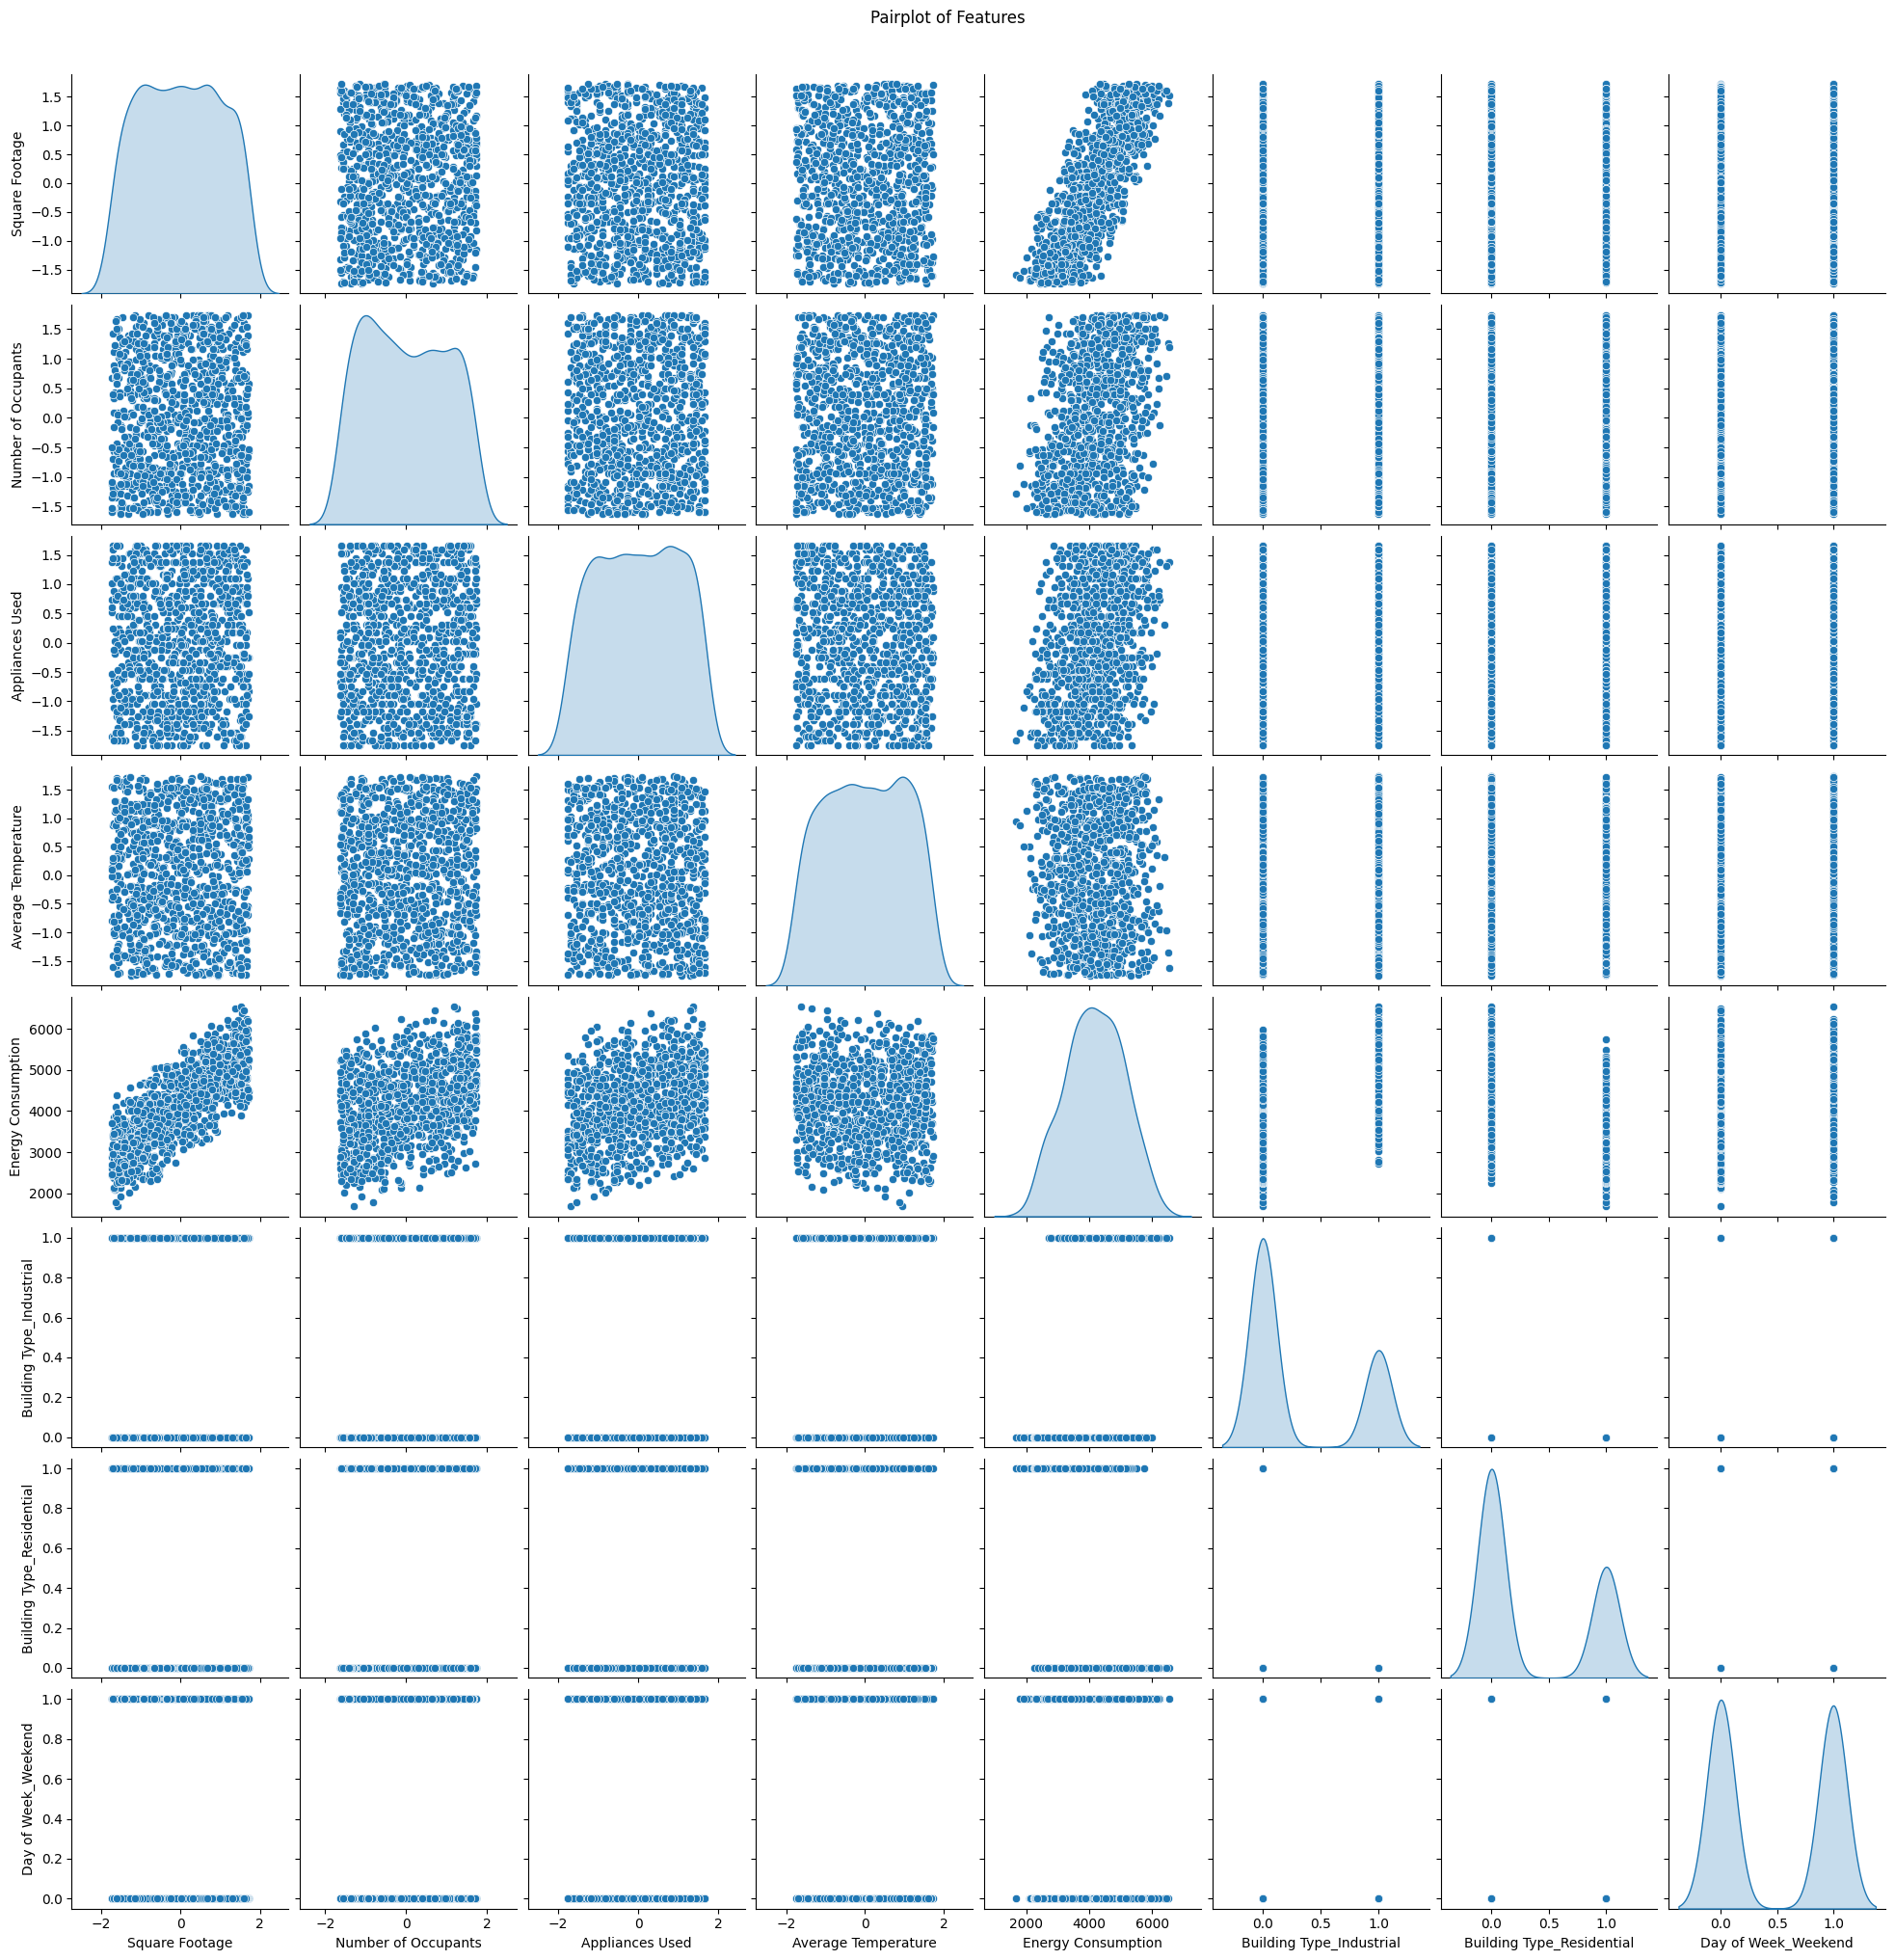

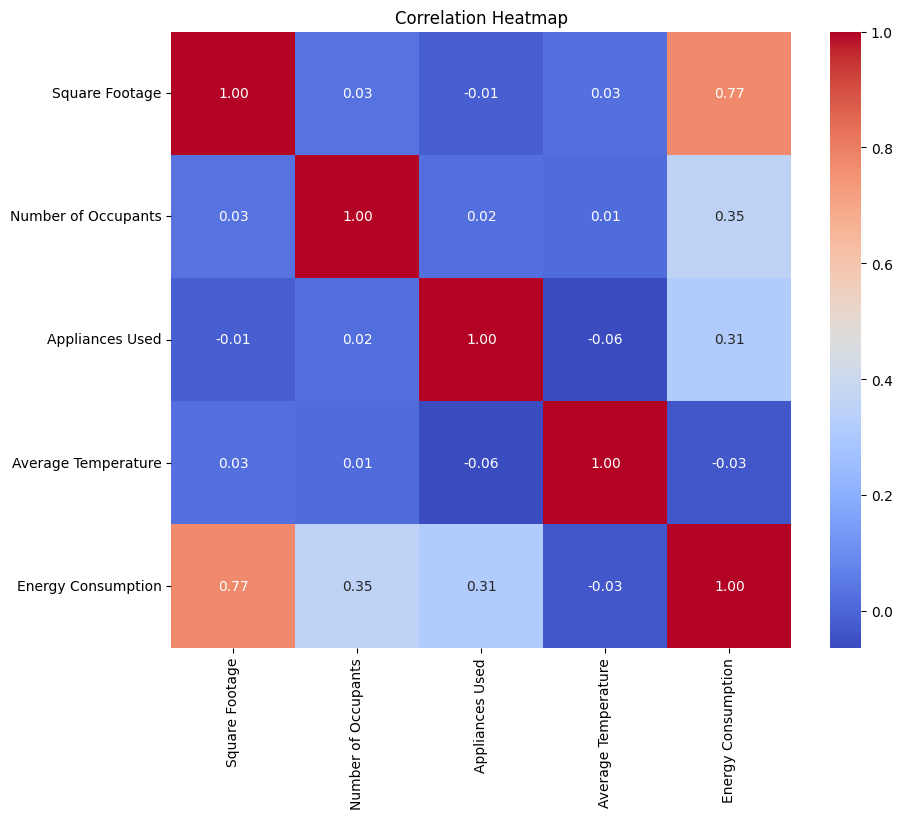

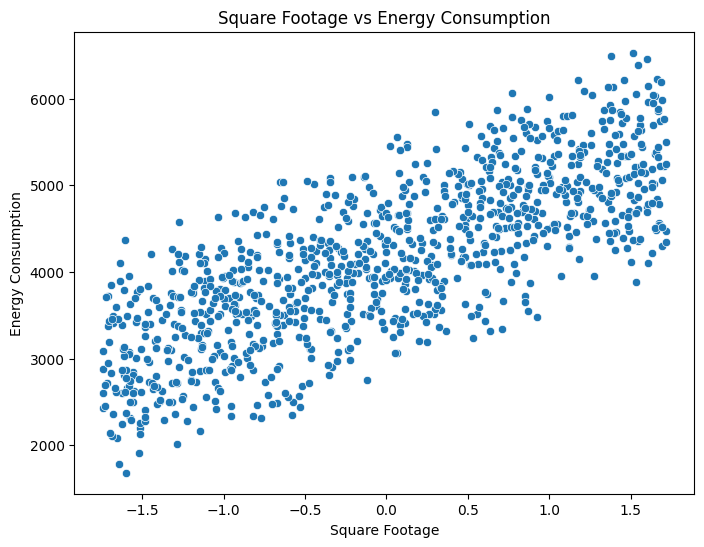

In [14]:
# Cell 4: Exploratory Data Analysis (EDA)
# Visualize distributions of numerical features
sns.pairplot(train_data, diag_kind="kde")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_data = train_data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot of selected feature vs. target
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data["Square Footage"], y=train_data["Energy Consumption"])
plt.title("Square Footage vs Energy Consumption")
plt.xlabel("Square Footage")
plt.ylabel("Energy Consumption")
plt.show()

In [15]:
# Cell 5: Train the Linear Regression Model
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 714.37005936  290.47446069  281.96252355  -35.68219041  500.00049184
 -500.00018854  -50.00076996]
Model Intercept: 4205.902859098284


Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.01
R² Score: 1.00


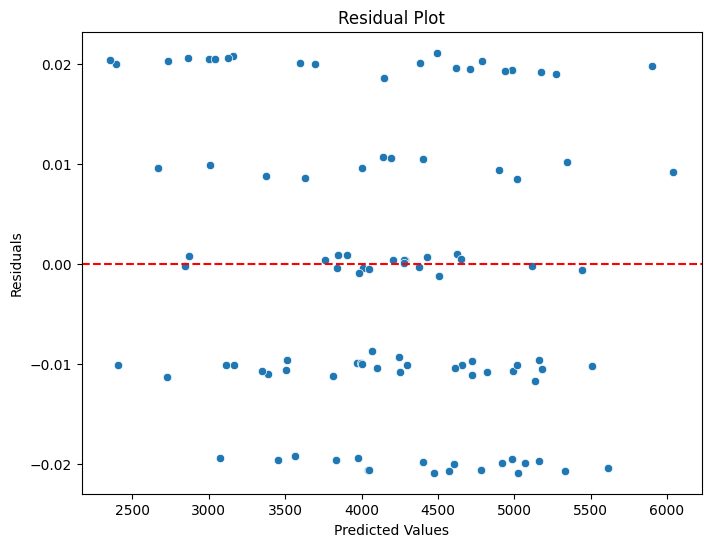

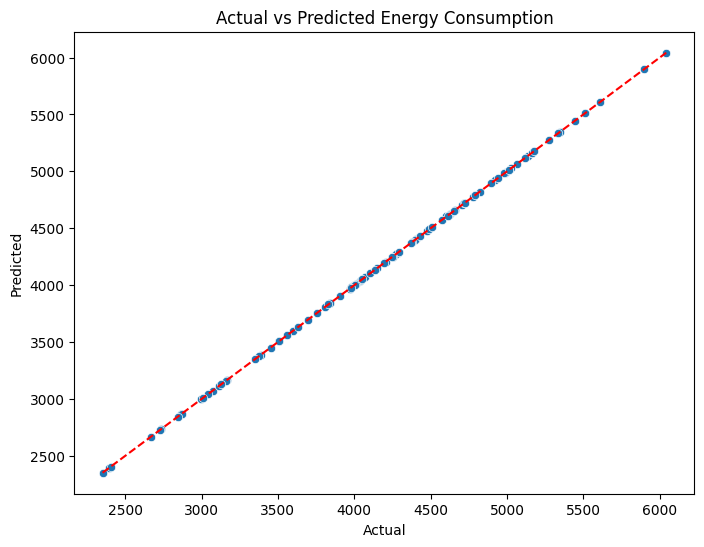

In [16]:
# Cell 6: Evaluate the Model
# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Prediction vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [17]:
# Cell 7: Save the Trained Model
# Save the model to a file for future use
model_path = "/content/linear_regression_model.pkl"
joblib.dump(model, model_path)
print(f"Trained model saved to: {model_path}")

Trained model saved to: /content/linear_regression_model.pkl
